In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['voice.csv']


In [2]:
def preprocss_data(df, train_ratio=0.8, normalize=True):
    cols = df.columns
    # add numerical category
    df['num_val'] = df['label'].map(lambda x: 1 if x.lower()=='male' else 0)
    att_cols = cols[:-1]
    # 
    if normalize:
        df[att_cols]=(df[att_cols]-df[att_cols].mean())/df[att_cols].std()        
    # split data into training and testing set
    df_l = len(df)
    df = df.sample(frac=1).reset_index(drop=True)
    training_X = df.loc[:int(df_l*train_ratio), att_cols]
    training_Y = df.loc[:int(df_l*train_ratio), 'num_val']
    testing_X = df.loc[int(df_l*train_ratio)+1:, att_cols]
    testing_Y = df.loc[int(df_l*train_ratio)+1:, 'num_val']
    return training_X, training_Y, testing_X, testing_Y, att_cols

def model_fit(training_X, training_Y, testing_X, testing_Y, att_cols, plot_acc=True, verbose=True):
    model = Sequential()
    model.add(Dense(12, input_dim=len(att_cols), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    hist = History()
    model.fit(training_X, training_Y, epochs=150, batch_size=10, callbacks = [hist], verbose=verbose)
    if plot_acc:
        pd.DataFrame(hist.history).plot(secondary_y=['loss'])
    scores = model.evaluate(testing_X, testing_Y)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    return model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
633/633 [==============================] - 0s 81us/step

acc: 96.68%


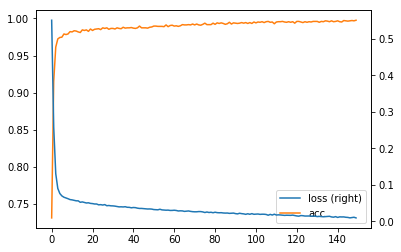

In [3]:
df = pd.read_csv("../input/voice.csv")
traing_X, training_Y, testing_X, testing_Y, att_cols = preprocss_data(df)
ret = model_fit(traing_X, training_Y, testing_X, testing_Y, att_cols, verbose=False)